In [49]:
# Import library and load data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

AQI = pd.read_csv("Air_Quality.csv")
AQI.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,NaN
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,NaN
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,NaN
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,NaN
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,NaN


In [45]:
# Check data info
AQI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18862 non-null  int64  
 1   Indicator ID    18862 non-null  int64  
 2   Name            18862 non-null  object 
 3   Measure         18862 non-null  object 
 4   Measure Info    18862 non-null  object 
 5   Geo Type Name   18862 non-null  object 
 6   Geo Join ID     18862 non-null  int64  
 7   Geo Place Name  18862 non-null  object 
 8   Time Period     18862 non-null  object 
 9   Start_Date      18862 non-null  object 
 10  Data Value      18862 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [46]:
# Count mean, median, and mode of 'Data Value' column
mean_AQI = AQI["Data Value"].mean()
mean_AQI = round(mean_AQI, 2)
median_AQI = AQI["Data Value"].median()
mode_AQI = AQI["Data Value"].mode()[0]
print(f"Mean: {mean_AQI}, Median: {median_AQI}, Mode: {mode_AQI}")

Mean: 21.05, Median: 14.79, Mode: 2.0


In [47]:
# Sort the data by Date
AQI_sorted = AQI.sort_values(by="Start_Date")

# Format the 'Start Date' column to datetime
AQI_sorted["Start_Date"] = pd.to_datetime(AQI_sorted["Start_Date"], format="%m/%d/%Y")

# Group by Geo Place Name
AQI_grouped = AQI_sorted.groupby("Geo Place Name").size().to_frame(name="count")
AQI_grouped.head()


,count
Geo Place Name,
Bay Ridge and Dyker Heights (CD10),116
Bayside - Little Neck,176
Bayside Little Neck-Fresh Meadows,105
Bayside and Little Neck (CD11),116
Bedford Stuyvesant (CD3),116


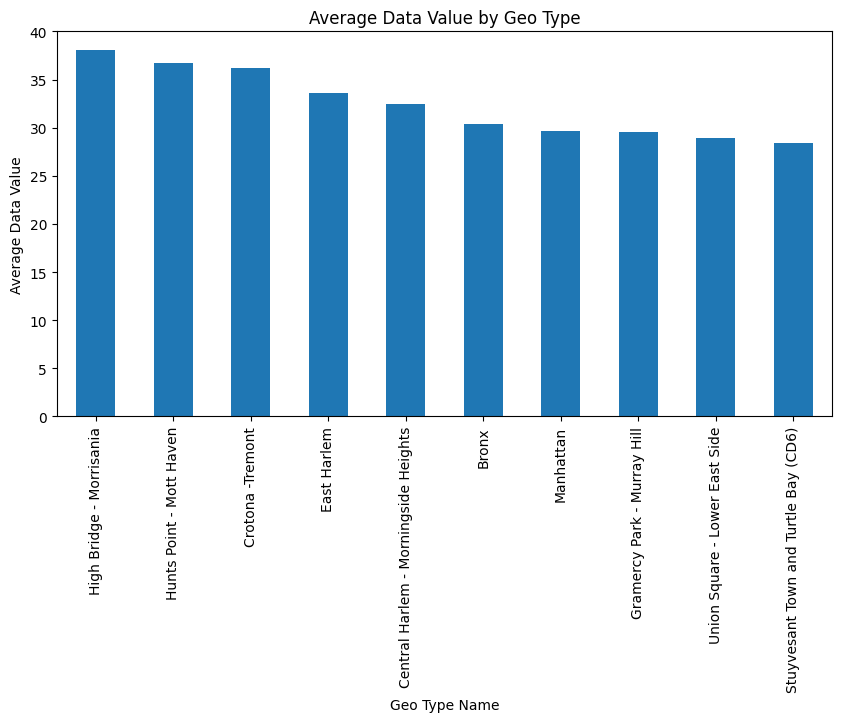

In [ ]:
# Create Top 10 Highest AQI Mean Values Bar Plot

AQI_grouped = AQI.groupby("Geo Place Name")["Data Value"].mean().sort_values()

top10 = AQI_grouped.nlargest(10)

top10.plot(kind="bar", figsize=(10, 5))
plt.title("Average Data Value by Geo Type")
plt.ylabel("Average Data Value")
plt.xlabel("Geo Type Name")
plt.show()

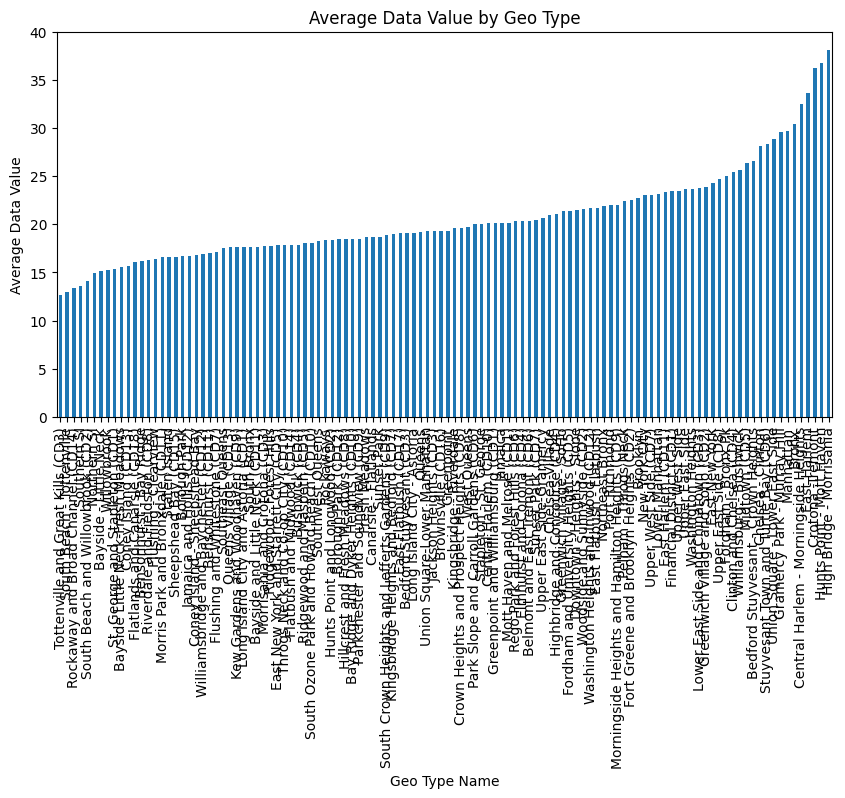

In [ ]:
# Plot the data
AQI_grouped.plot(kind="bar", figsize=(10, 5))
plt.title("Average Data Value by Geo Type")
plt.ylabel("Average Data Value")
plt.xlabel("Geo Type Name")
plt.show()